##### Analysis results using radiation processor- radiation_atmos_av_mon
The radiation processor makes plots to compare model and observed radiation field variables for the available observation sources specified in the processor.  The plots contain three panels to display "model", "observed", and "model minus observed" two-dimensional latitude/longitude climatological field variables.

Original author: Charles Seman, GFDL. 

To use this notebook, please ensure the Input parameters are set and run it in your jupyter notebook environment with all the dependencies installed from this git repository. Input datasets needed are available at:
https://www.gfdl.noaa.gov/am4.0-model
 

Note: 
This notebook was run at GFDL in a Linux environment. The environment variables used along with software requirements is documented below for your reference.

Please note that the data used by any script in this analysis suite can be found in the git repo to be able to reproduce the analysis in your local notebook. Any CMIP data references can be found in GFDL's Data Portal. 
Ref. https://www.gfdl.noaa.gov/am4.0-model


in your env Flexible Runtime Environment. The following environment variables will allow a user to run this analysis script contained within the git repo without explicit "module load". But, the user is expected to copy the directories referenced in the following from the git repo. Also, we will set up an alias to gcp commands. GCP is a GFDL home-grown smart data transfer utility. For public facing scripts, it is enough that the user uses "cp" or other copy tools relevant to their runtime environment.

Acknowledgment: 
GFDL Modeling Services and Data Portal Team.
Charles Seman, Huan Guo et al. 


Software Requirements

1. NETCDF 4.2
2. HDF 1.8.8
3. Python2.Xwith (subprocess,commands,os,sys,git)
    Run using: 2.7.12 |Anaconda custom (64-bit)
    [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
4. NCO 4.1.0
5. GrADS/2.0.a7.oga.3



OBS datasets used if any: CERES EBAF Edition2.8
#=======================================================================
 CERES EBAF Edition2.8 v2 obs data sources:

 TOA 

  NASA CERES EBAF TOA Edition2.8
  Energy Balanced and Filled 1 Degree Monthly (3/2000 - 7/2016) and
  16-year Climatology

  CERES Data Products:
  http://ceres.larc.nasa.gov/order_data.php : "EBAF-TOA", to:

  CERES EBAF-TOA Product Information:
  http://ceres.larc.nasa.gov/products.php?product=EBAF-TOA : "Browse & Subset", to:

  CERES_EBAF-TOA_Ed2.8 Subsetting and Browsing:
  http://ceres-tool.larc.nasa.gov/ord-tool/jsp/EBAFSelection.jsp
  the following "Product Statement" is an edited version of a copy
  taken from the bottom of https://ceres-tool.larc.nasa.gov/ord-tool/srbavg
  during the "Get Data" part of the data order process:

                             Product Statement
                          - CERES_EBAF-TOA_Ed2.8 -

  Product Description:

  The CERES_EBAF-TOA_Ed2.8 provides monthly and climatological averages of
  clear-sky fluxes, all-sky fluxes, and cloud radiative effect (CRE) fluxes at#  TOA, that are energy balanced to the ocean heat storage term and clear-sky
  spatially filled. More information can be obtained here: CERES-EBAF-TOA
  http://ceres.larc.nasa.gov/products.php?product=EBAF-TOA .

  Product Data Quality Summary:

  The EBAF-TOA data quality summary
  http://ceres.larc.nasa.gov/documents/DQ_summaries/CERES_EBAF_Ed2.8_DQS.pdf
  provides more information of the content.

  Product Attribution:
  The CERES Team has made considerable efforts to remove major errors and to
  verify the quality and accuracy of this data. Please specify the CERES product
  and version as "CERES EBAF-TOA Ed2.8" and provide a reference to the following
  paper when you publish scientific results with the data:

      Loeb, N.G., B.A. Wielicki, D.R. Doelling, G.L. Smith, D.F. Keyes, S. Kato,
      N. Manalo-Smith, and T. Wong, 2009: Toward Optimal Closure of the Earth's
      Top-of-Atmosphere Radiation Budget. Journal of Climate, Volume 22, Issue 3
      (February 2009) pp. 748-766. doi: 10.1175/2008JCLI2637.1

Figures 5 and 6 use only the TOA (Top-Of-Atmosphere) OBS
Observation datasets used in this analysis can be found in a different location as documented in https://www.gfdl.noaa.gov/am4.0-model

Note: GFDL has a module environment set up to load Flexible Runtime Environment. The following environment variables will allow a user to run this analysis script contained within the git repo without explicit "module load". But, the user is expected to copy the directories referenced in the following from the git repo. Also, one has to set up an alias to gcp commands. GCP is a GFDL home-grown smart data transfer utility. For public facing scripts, it is enough that the user uses "cp" or other copy tools relevant to their runtime environment.  Any output filenames referenced in the scripts may also slightly vary with the published output.

In [29]:
import os
os.environ['GITROOT']='/net/a1r/AM4notebooks/' #Where is your cloned git repo?
os.environ['DATAROOT']='/home/a1r/AM4/' #Where is your data repo? i.e model output and OBS that is needed from GFDL Data portal

os.environ['TMPDIR'] = "/net/a1r/v5" # Please provide a temporary directory.

#Note: Any reference to gcp or globus can be disregarded if run in outside of GFDL. Copy (or other relevant) can be used to replace the use of gcp elsewhere. 
os.environ['FRE_ANALYSIS_ARCHIVE']=os.environ['DATAROOT']+'/JAMES/OBS/cjs/fms/fre-analysis/'
os.environ['obs_data_file']=os.environ['FRE_ANALYSIS_ARCHIVE']+'/radiation_atmos_av_mon/'

os.environ['PATH']='/usr/local/x64/grads-2.0.a7.oga.3/Contents:/usr/local/gcp/2.3.11:/usr/local/x64/globus/5.2.1/bin:/usr/local/x64/globus/5.2.1/sbin:/usr/local/x64/netcdf-4.2_optimized/bin:/usr/local/x64/nco-4.3.1/bin:/usr/local/x64/hdf5-1.8.8_optimized/bin:/usr/local/x64/intel/Compiler/11.1/073/bin/intel64:/home/gfdl/bin:/usr/local/OSoverlay/bin:/bin:/usr/bin:/usr/local/x64/bin:/usr/local/bin:/usr/local/explorer/bin:/usr/local/pgi/linux86/bin:/usr/local/cleanscape:/usr/local/toolworks/totalview/bin:/usr/local/autodesk/maya/bin:.'
os.environ['LD_LIBRARY_PATH']='/usr/local/x64/globus/5.2.1/lib64:/usr/local/x64/nco-4.3.1/lib:/usr/local/x64/netcdf-4.2_optimized/lib:/usr/local/x64/hdf5-1.8.8_optimized/lib:/usr/local/x64/intel/Compiler/11.1/073/lib/intel64:/usr/local/globus/5.2.1/lib'
os.environ['CPATH'] ='/usr/local/x64/netcdf-4.2_optimized/include:/usr/local/x64/hdf5-1.8.8_optimized/include'
os.environ['FRE_ANALYSIS_GIT_URL']= 'file:///home/fms/local/opt/fre-analysis/git' # Please see reference in git repo
os.environ['FPATH']='/usr/local/x64/netcdf-4.2_optimized/include'
os.environ['LIBRARY_PATH']='/usr/local/x64/netcdf-4.2_optimized/lib:/usr/local/x64/hdf5-1.8.8_optimized/lib'
os.environ['GLOBUS_LOCATION']='/usr/local/x64/globus/5.2.1'
os.environ['GLOBUS_PATH']='/usr/local/x64/globus/5.2.1'
os.environ['X509_CERT_DIR']='/usr/local/x64/globus/5.2.1/etc/grid-security/certificates'
os.environ['LIBPATH']='/usr/local/x64/globus/5.2.1/lib'
os.environ['SHLIB_PATH']='/usr/local/x64/globus/5.2.1/lib'
os.environ['X509_CERT_DIR']='/usr/local/x64/globus/5.2.1/etc/grid-security/certificates'
os.environ['FRE_ANALYSIS_ARCHIVE']='/archive/fms/fre-analysis/test' # Please see reference in git repo
os.environ['_LM_FILES_']='/usr/local/Modules/modulefiles/globus/5.2.1:/usr/local/Modules/x64/modulefiles/intel_compilers/11.1.073:/usr/local/Modules/modulefiles/gcp/2.3:/usr/local/Modules/x64/modulefiles/hdf5/1.8.8:/usr/local/Modules/x64/modulefiles/netcdf/4.2:/usr/local/Modules/x64/modulefiles/nco/4.3.1:/usr/local/Modules/modulefiles/grads/2.0.a7.oga.3'
os.environ['MANPATH']='/usr/local/x64/nco-4.3.1/man:/usr/local/x64/netcdf-4.2_optimized/share/man:/usr/local/x64/intel/Compiler/11.1/073/man/en_US:/usr/local/globus/5.2.1/man:/home/gfdl/man:/usr/share/man:/usr/X11R6/man:/usr/local/x64/share/man:/usr/local/man:/usr/local/pgi/man:/usr/local/toolworks/totalview/man'
os.environ['INTEL_LICENSE_FILE']='/usr/local/x64/intel/licenses'

In [30]:
#!/usr/bin/python
############## load modules #####################
import subprocess,commands,os,sys
from subprocess import PIPE
from git import Repo

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Original Script and author:radiation_atmos_av_mon.csh ,Charles Seman (GFDL)
# Jupyter notebook development : Aparna Radhakrishnan (GFDL)
# Output: Creates figures in $out_dir/atmos_${yr1}_${yr2}
####INPUT PARAMETERS######

#Please note this script uses time averaged files as input. On the GFDL Data portal, you'll find the time-series files and a script that helps with converting them to time-averaged to work with this script. 

#For in_data_dir and in_data_file, please edit references to input from your local file system as relevant. 
in_data_dir = '/archive/Huan.Guo/awg/warsaw/c96L33_am4p0_cmip6Diag/gfdl.ncrc4-intel-prod-openmp/pp/atmos_cmip/av/monthly_35yr/'
in_data_file = 'atmos_cmip.1980-2014.{01,02,03,04,05,06,07,08,09,10,11,12}.nc'
out_dir = '/net/a1r/awg/warsaw/c96L33_am4p0_cmip6Diag' #Please provide an output directory
yr1 = '1980'
yr2 = '2014'
descriptor = 'AM4.0'
# Please see reference in git repo
BASEDIR=os.environ['GITROOT']+'/cjs1/' # Please see reference in git repo

########### end of analysis template variables  #######
platform = 'desktop' 

In [ ]:
####### load modules ###########
TMPDIR = os.environ["TMPDIR"]
FRE_CODE_BASE = BASEDIR
PACKAGE_NAME = 'radiation_atmos_av_mon'
if not os.path.exists(TMPDIR):
     os.makedirs(TMPDIR)
if not os.path.exists(out_dir):
     os.makedirs(out_dir)            
if ( platform == 'hpcs-csc' ) or ( platform == 'desktop'):
    print("Running script on non-GFDL machine and public repo: skip module load") 
else:
    print "ERROR: invalid platform: %s" % platform
    exit(1)

#---- Check if environment loaded correctly ---#

###################
# run the script
##################


options = "-i "+in_data_dir+" -d "+descriptor+" -y "+yr1+","+yr2+" -o "+out_dir

command = FRE_CODE_BASE+"/"+PACKAGE_NAME+"/radiation_atmos_av_mon.csh "+options+" "+in_data_file

print(command)

cmd = subprocess.Popen('tcsh -c "'+command+'"',shell=True,stdout=PIPE,stdin=PIPE, stderr=PIPE)
output, errors = cmd.communicate()
#print output, errors 

Display Output Figure
title1='Long-term annual mean OLR in Wm−2 from (a) AM4.0/LM4.0 AMIP simulation, (b) observational estimate based on CERES-EBAF-ed2.8, averaged over the 2000-2015 period. (c) shows model biases (AM4.0/LM4.0 minus CERES). (d) As in (c) except for AM2.1. (e) As in (c) except for AM3. Legends of panels (c-e) show global mean biases, spatial correlations and RMS errors.'
print("Figure 5 (a)(b)(c) from AM4 paper", title1)


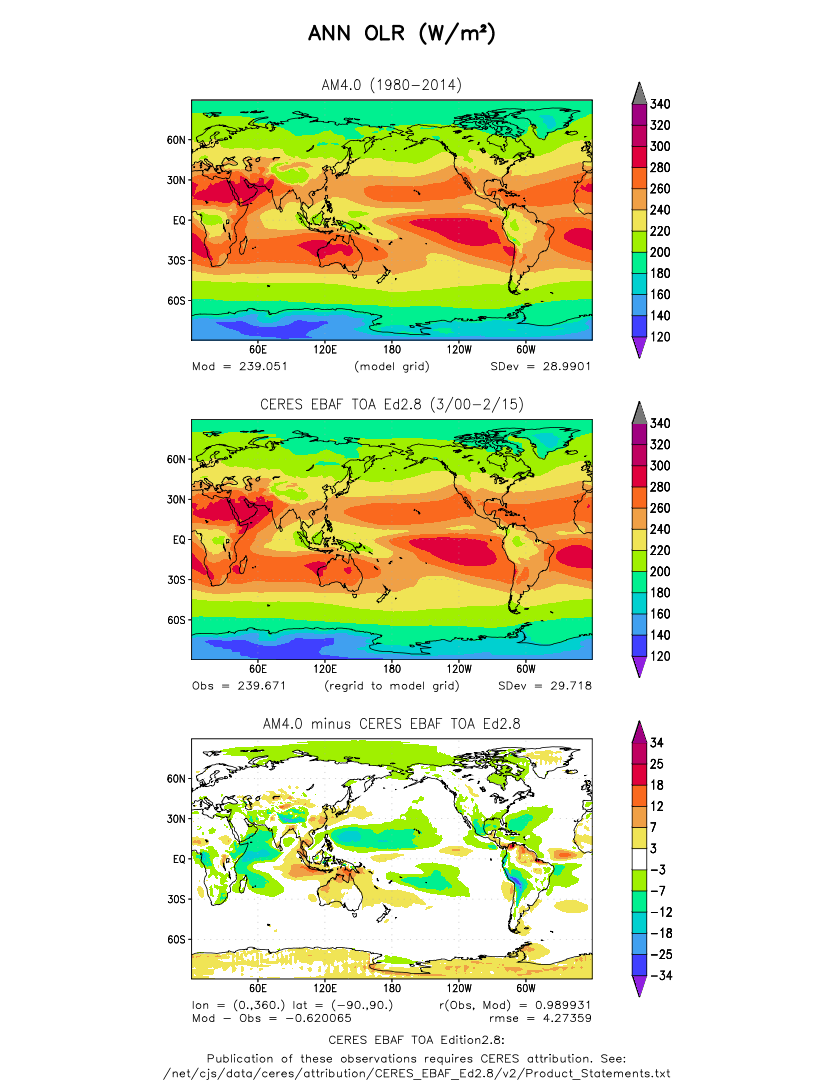

In [39]:
out_dir='/net/a1r/awg/warsaw/c96L33_am4p0_cmip6Diag' #Please provide an output directory
out_dir1= out_dir+'/atmos_1980_2014/OUTPUT/Seman.radiation_toa/olr.ceres_ebaf_toa_ed2.8/olr.ceres_ebaf_toa_ed2.8.ann.png'
out_dir2 = out_dir+'/atmos_1980_2014/OUTPUT/Seman.radiation_toa/netrad.ceres_ebaf_toa_ed2.8/netrad.ceres_ebaf_toa_ed2.8.ann.png'
from IPython.display import Image
from IPython.display import display

display(Image(out_dir1)) 



In [40]:
title2='Long-term annual mean TOA net radiative flux in Wm−2 from (a) AM4.0/LM4.0 AMIP simulation, (b) observational estimate based on CERES-EBAF- ed2.8, averaged over the 2000-2015 period. (c) shows model biases (AM4.0/LM4.0 minus CERES). (d) As in (c) except for AM2.1. (e) As in (c) except for AM3. Legends of panels (c-e) show global mean biases, spatial correlations and RMS errors.'
print("Figure 6 (a)(b)(c) from AM4 paper", title2)


('Figure 6 (a)(b)(c) from AM4 paper', 'Long-term annual mean TOA net radiative flux in Wm\xe2\x88\x922 from (a) AM4.0/LM4.0 AMIP simulation, (b) observational estimate based on CERES-EBAF- ed2.8, averaged over the 2000-2015 period. (c) shows model biases (AM4.0/LM4.0 minus CERES). (d) As in (c) except for AM2.1. (e) As in (c) except for AM3. Legends of panels (c-e) show global mean biases, spatial correlations and RMS errors.')


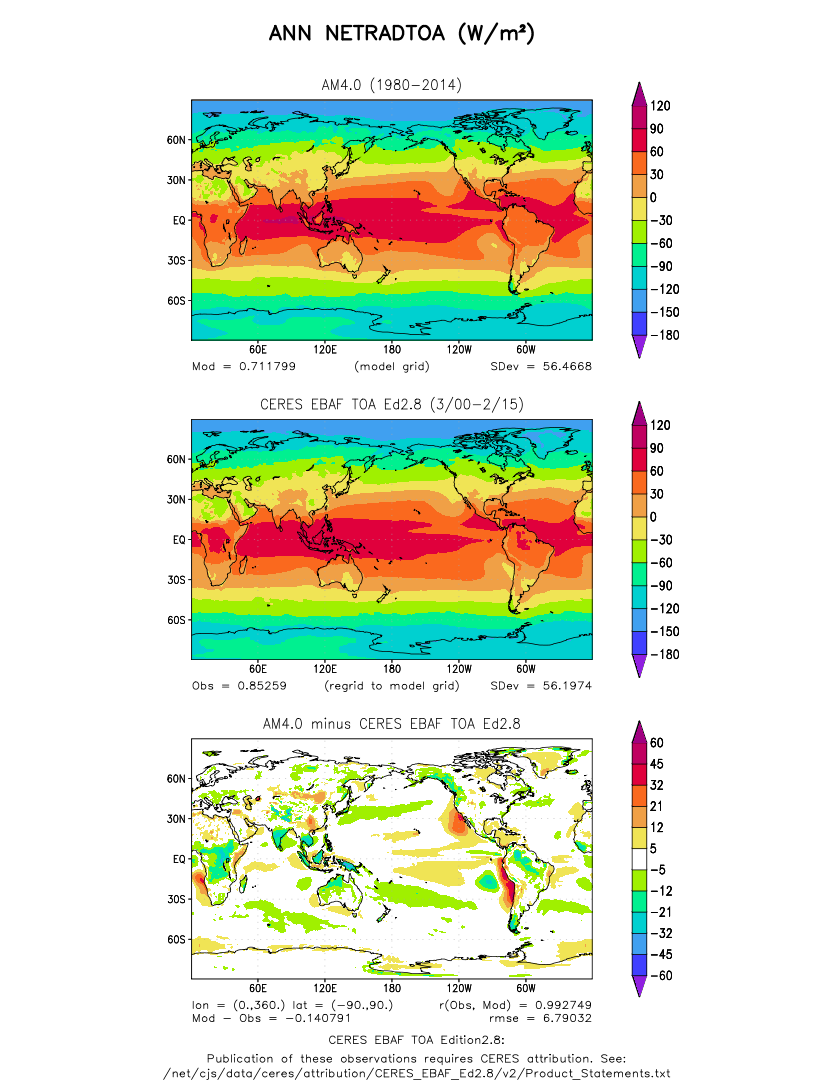

In [41]:
display(Image(out_dir2)) 